# **Fashion MNIST**

Fashion MNIST dataset: một tập dữ liệu gồm các hình ảnh sản phẩm của Zalando — bao gồm một tập huấn luyện với 60.000 mẫu và một tập kiểm tra với 10.000 mẫu. Mỗi mẫu là một hình ảnh xám 28x28, đi kèm với một nhãn thuộc 1 trong 10 lớp. Zalando dự định Fashion-MNIST sẽ thay thế trực tiếp cho tập dữ liệu MNIST gốc trong việc đánh giá hiệu suất các thuật toán học máy. Nó có cùng kích thước ảnh và cấu trúc chia tập huấn luyện và kiểm tra như MNIST.

Goal: phân loại hình ảnh xám Fashion-MNIST vào 10 lớp


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras import layers
from tensorflow import keras

print(f"Tensorflow: {tf.__version__}\nKeras: {keras.__version__}")

Tensorflow: 2.18.0
Keras: 3.8.0


1. LOAD DATA: Do dùng luôn Tensorflow framework nên sẽ sử dụng luôn cái Dataset được cung cấp bởi Tensorflow hay chính xác hơn là cung cấp bởi Keras (sau khi load sẽ sẽ được lưu vào cái local của mình hay chính xác hơn là ổ đĩa của Colab)


In [ ]:
(x_train, y_train),(x_test, y_test)=keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [ ]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_train.dtype, y_train.dtype

(dtype('uint8'), dtype('uint8'))

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 155, 236, 207, 178, 107, 156, 161, 109,  64,  23,  77, 130,
         72,  15],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,
         69, 207, 223, 218, 216, 216, 163, 127, 121, 122, 146, 141,  88,
        172,  66],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   1,   1,   0,
        200, 232, 232, 233, 229, 223, 223, 215, 213, 164, 127, 123, 196,
        229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        183, 225, 216, 223, 228, 235, 227, 224, 222, 224, 221, 223, 245,
        173,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
        193, 228, 218, 213, 198, 180, 212, 210, 211, 213, 223, 220, 243,
        202,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1,   3,   0,  12,
        219, 220, 212, 218, 192, 169, 227, 208, 218, 224, 212, 226, 197,
        209,  52],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,   0,  99,
        244, 222, 220, 218, 203, 198, 221, 215, 213, 222, 220, 245, 119,
        167,  56],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,  55,
        236, 228, 230, 228, 240, 232, 213, 218, 223, 234, 217, 217, 209,
         92,   0],
       [  0,   0,   1,   4,   6,   7,   2,   0,   0,   0,   0,   0, 237,
        226, 217, 223, 222, 219, 222, 221, 216, 223, 229, 215, 218, 255,
         77,   0],
       [  0,   3,   0,   0,   0,   0,   0,   0,   0,  62, 145, 204, 228,
        207, 213, 221, 218, 208, 211, 218, 224, 223, 219, 215, 224, 244,
        159,   0],
       [  0,   0,   0,   0,  18,  44,  82, 107, 189, 228, 220, 222, 217,
        226, 200, 205, 211, 230, 224, 234, 176, 188, 250, 248, 233, 238,
        215,   0],
       [  0,  57, 187, 208, 224, 221, 224, 208, 204, 214, 208, 209, 200,
        159, 245, 193, 206, 223, 255, 255, 221, 234, 221, 211, 220, 232,
        246,   0],
       [  3, 202, 228, 224, 221, 211, 211, 214, 205, 205, 205, 220, 240,
         80, 150, 255, 229, 221, 188, 154, 191, 210, 204, 209, 222, 228,
        225,   0],
       [ 98, 233, 198, 210, 222, 229, 229, 234, 249, 220, 194, 215, 217,
        241,  65,  73, 106, 117, 168, 219, 221, 215, 217, 223, 223, 224,
        229,  29],
       [ 75, 204, 212, 204, 193, 205, 211, 225, 216, 185, 197, 206, 198,
        213, 240, 195, 227, 245, 239, 223, 218, 212, 209, 222, 220, 221,
        230,  67],
       [ 48, 203, 183, 194, 213, 197, 185, 190, 194, 192, 202, 214, 219,
        221, 220, 236, 225, 216, 199, 206, 186, 181, 177, 172, 181, 205,
        206, 115],
       [  0, 122, 219, 193, 179, 171, 183, 196, 204, 210, 213, 207, 211,
        210, 200, 196, 194, 191, 195, 191, 198, 192, 176, 156, 167, 177,
        210,  92],
       [  0,   0,  74, 189, 212, 191, 175, 172, 175, 181, 185, 188, 189,
        188, 193, 198, 204, 209, 210, 210, 211, 188, 188, 194, 192, 216,
        170,   0],
       [  2,   0,   0,   0,  66, 200, 22

In [ ]:
class_names = ['Áo thun/ Áo kiểu', 'quần dài', 'Áo len chui đầu', 'Váy liền', 'Áo khoác',
               'Dép Sandal', 'Áo sơ mi', 'Giày thể thao', 'Túi xách', 'Bốt cổ ngắn']

num_classes = len(class_names)  # Đếm số lớp

print(num_classes)  # Kết quả: 10


10


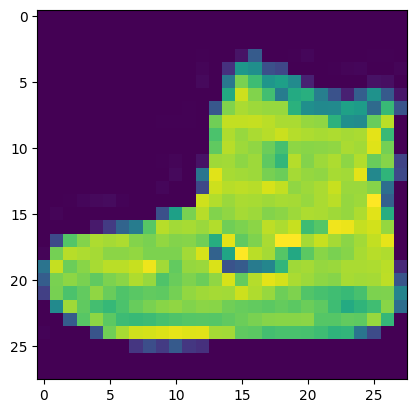

In [ ]:
plt.imshow(x_train[0])

In [ ]:
def plot_data(x_data: np.ndarray, y_data: np.ndarray) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(8, 4))

    len_x = x_data.shape[0]
    for idx in range(nrows * ncols):
        ax = axes[idx // ncols, idx % ncols]
        img_idx = random.randint(0, len_x - 1)
        ax.imshow(x_data[img_idx], cmap="gray")
        ax.set(xticks=[], yticks=[])

        true_label_str = f"True: {class_names[y_data[img_idx]]}"  # Đổi class_name → class_names
        ax.set_xlabel(true_label_str, color='green', fontsize=12)

    plt.tight_layout()
    plt.show()


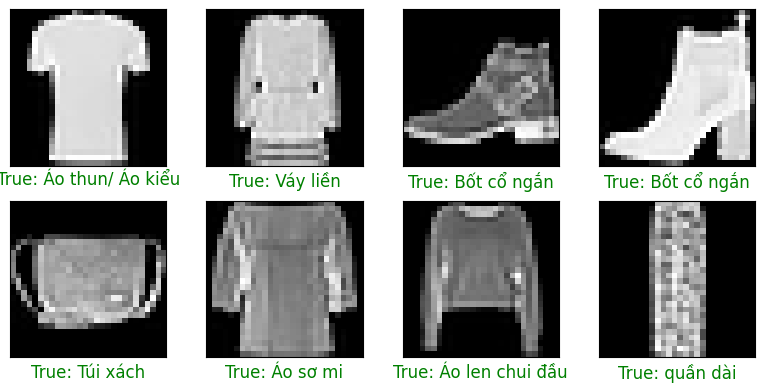

In [ ]:
from typing import Optional

def plot_data(x_data: np.ndarray, y_data: np.ndarray, y_proba: Optional[np.ndarray] = None) -> None:
    nrows, ncols = 2, 4
    fig, axes = plt.subplots(nrows, ncols, figsize=(8, 4))

    len_x = x_data.shape[0]
    for idx in range(nrows * ncols):
        ax = axes[idx // ncols, idx % ncols]
        img_idx = random.randint(0, len_x)

        ax.imshow(x_data[img_idx], cmap='gray')
        ax.set(xticks=[], yticks=[])
        color = 'green'
        true_label_str = f"True: {class_names[y_data[img_idx]]}"

        if y_proba is not None:
            predicted_idx = np.argmax(y_proba[img_idx])
            predicted_label = class_names[predicted_idx]
            color = 'red' if predicted_idx != y_data[img_idx] else color
            predicted_label_str = f"\nPredicted: {predicted_label}"

        img_title = true_label_str if y_proba is None else true_label_str + predicted_label_str
        ax.set_xlabel(img_title, color=color, fontsize=12)

    plt.tight_layout()
    plt.show()
plot_data(x_train, y_train)

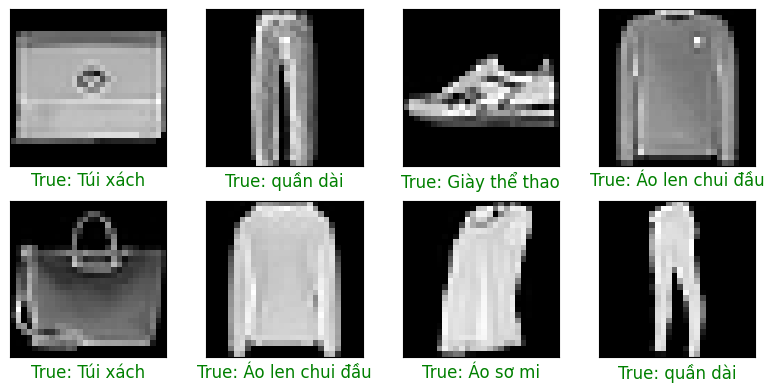

In [ ]:
plot_data(x_test, y_test) # Cái này là thử với tập test

# 2.Image Pre-Processing

1.   Tiếp theo sẽ là đi tinh chỉnh những
bức ảnh này trước khi mà để đem đi train cái mô hình Deep learning


*   Định hình lại dữ liệu theo đúng mô hình yêu cầu và chuẩn hóa sao cho giá trị nằm trong khoảng [0,1]
*   Chuyển đổi dữ liệu từ kiểu Uint8 sang Float32







In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
x_test.shape, x_test.dtype

((10000, 28, 28), dtype('float32'))

In [ ]:
# make sure Images have shape )60000, 28, 28) => (60000, 28, 28, 1)
x_train = np.expand_dims(x_train, axis = -1)

In [ ]:
x_train.shape

In [ ]:
x_test = np.expand_dims(x_test, axis = -1)

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
class_nums = 10
y_train_label = keras.utils.to_categorical(y_train, class_nums)
y_test_label = keras.utils.to_categorical(y_test, class_nums)

In [ ]:
y_train[0], y_train_label[0]

(np.uint8(9), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

3. Network (ANN) Architecure

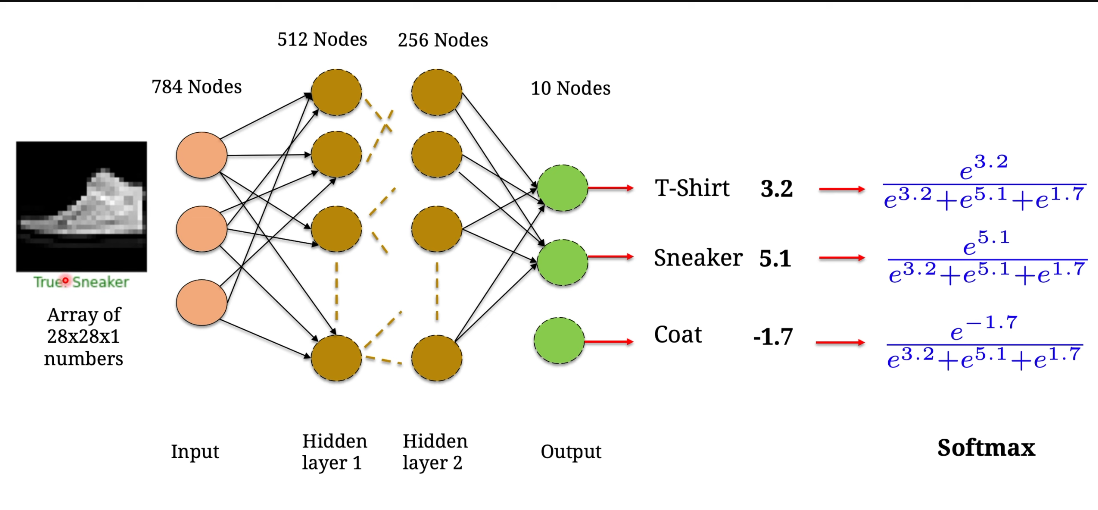

In [ ]:
input_shape = (28, 28, 1)

In [ ]:
model = keras.models.Sequential([
    layers.Flatten(input_shape=input_shape), # (28, 28,1) -> 784
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(class_nums, activation='softmax')
    ])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
epochs = 10
batch_size = 128
history = model.fit(x_train, y_train_label,
          epochs= epochs,
          batch_size = batch_size,
          validation_split=0.1
         )

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7332 - loss: 0.7548 - val_accuracy: 0.8557 - val_loss: 0.4023
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8533 - loss: 0.3903 - val_accuracy: 0.8515 - val_loss: 0.4080
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.8728 - loss: 0.3446 - val_accuracy: 0.8677 - val_loss: 0.3545
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8806 - loss: 0.3156 - val_accuracy: 0.8497 - val_loss: 0.4169
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.8906 - loss: 0.2926 - val_accuracy: 0.8793 - val_loss: 0.3369
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8965 - loss: 0.2761 - val_accuracy: 0.8760 - val_loss: 0.3482
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9029 - loss: 0.2565 - val_accuracy: 0.8428 - val_loss: 0.4285
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9045 - loss: 0.2503 - val_ac

In [ ]:
history_dict = history.history

In [ ]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [ ]:
train_loss, val_loss = history_dict["loss"], history_dict["val_loss"]
train_acc, val_acc = history_dict["accuracy"], history_dict["val_accuracy"]

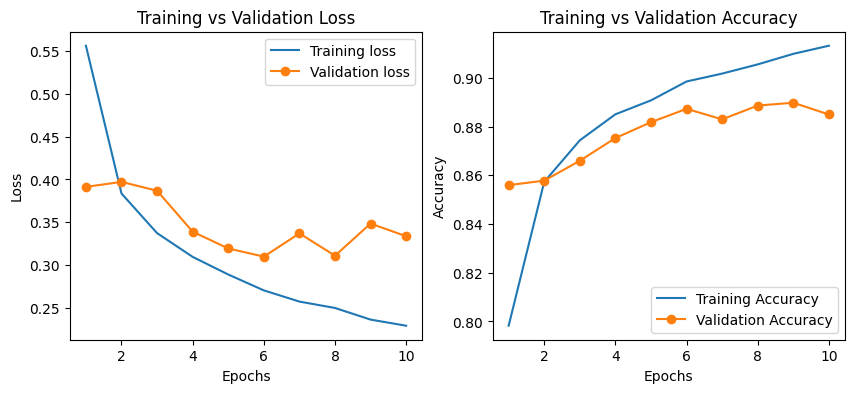

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
epoch_runs = [i+1 for i in range(epochs)]

ax1.plot(epoch_runs, train_loss, label = 'Training loss')
ax1.plot(epoch_runs, val_loss, label = 'Validation loss', marker = "o")
ax1.set(title='Training vs Validation Loss', xlabel = 'Epochs', ylabel='Loss')
ax1.legend()

ax2.plot(epoch_runs, train_acc, label = 'Training Accuracy')
ax2.plot(epoch_runs, val_acc, label = 'Validation Accuracy', marker = "o")
ax2.set(title='Training vs Validation Accuracy', xlabel = 'Epochs', ylabel='Accuracy')
ax2.legend()

# 4. Model Evalution

In [ ]:
score = model.evaluate(x_test, y_test_label)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8754 - loss: 0.3542


In [ ]:
print(f"Test loss: {score[0]: .4f}")
print(f"Test Acccuracy: {score[1]: .4f}")

Test loss:  0.3576
Test Acccuracy:  0.8760


# 5. Prediction

In [ ]:
x_sample = x_test[:3]
y_proba = model.predict(x_sample)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


In [ ]:
y_proba.round(3)

array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.008, 0.   ,
        0.992],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [ ]:
predictions = np.argmax(y_proba, axis=1)

In [ ]:
[class_names[pred] for pred in predictions]

['Bốt cổ ngắn', 'Áo len chui đầu', 'quần dài']

In [ ]:
y_proba = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


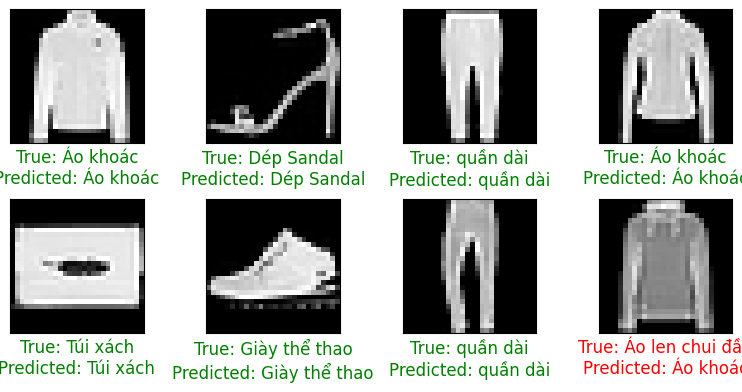

In [ ]:
plot_data(x_test, y_test, y_proba)